In [1]:
%load_ext Cython

In [2]:
%%cython -a

cimport cython
from cython.parallel import prange
import numpy as np
cimport numpy as np
from libc.math cimport sqrt
from PIL import Image



cpdef display(field):
    return Image.fromarray(np.uint8(field))



@cython.boundscheck(False)
@cython.wraparound(False)
@cython.initializedcheck(False)
@cython.nonecheck(False)
cdef void jacobi_iteration(double[:,:] A, int[:,:] mask):
    cdef int i, j, n, m
    cdef double tmp
    n, m = A.shape[0], A.shape[1]
    for i in range(1, n-1):
        for j in range(1, m-1):
            if mask[i, j]:
                tmp = 0.25 * (A[i-1, j] + A[i+1, j] + A[i, j-1] + A[i, j+1])
                A[i, j] = tmp

                
                
@cython.boundscheck(False)
@cython.wraparound(False)
@cython.initializedcheck(False)
@cython.nonecheck(False)
cpdef Jacobi_fx(double[:,:] A, int[:,:] mask, int max_iterations, double error):
    cdef int i, n, m, iteration
    cdef double norm, norm_prev, tmp_error
    norm_prev = 0
    norm = 0
    iteration = 0
    n, m = A.shape[0], A.shape[1]
    for i in range(max_iterations):
        norm = np.linalg.norm(A)
        jacobi_iteration(A, mask)
        tmp_error = abs(norm - norm_prev)
        norm_prev = norm
        iteration = iteration + 1
        if tmp_error < error:
            break
    return A, tmp_error, iteration




In [3]:
# Create potential array filled with zeros
potential = np.random.rand(1080, 1920)

# Create mask array filled with ones
mask = np.ones((1080, 1920), dtype=int)

# Get center coordinates
center_x1, center_y1 = potential.shape[0] // 4, potential.shape[1] // 2
center_x2, center_y2 = potential.shape[0] // 2, potential.shape[1] // 4
center_x3, center_y3 = potential.shape[0] // 1.3333, potential.shape[1] // 2
center_x4, center_y4 = potential.shape[0] // 2, potential.shape[1] // 1.3333
# Create circular mask
# Create circular mask
for i in range(potential.shape[0]):
    for j in range(potential.shape[1]):
        if (i - center_x1)**2 + (j - center_y1)**2 <= 150**2:
            mask[i, j] = 0
            potential[i, j] = 10.
        elif (i - center_x2)**2 + (j - center_y2)**2 <= 150**2:
            mask[i, j] = 0
            potential[i, j] = 10.
        elif (i - center_x3)**2 + (j - center_y3)**2 <= 150**2:
            mask[i, j] = 0
            potential[i, j] = 10.
        elif (i - center_x4)**2 + (j - center_y4)**2 <= 150**2:
            mask[i, j] = 0
            potential[i, j] = 10.



In [13]:
potential[:,0].shape

(1080,)

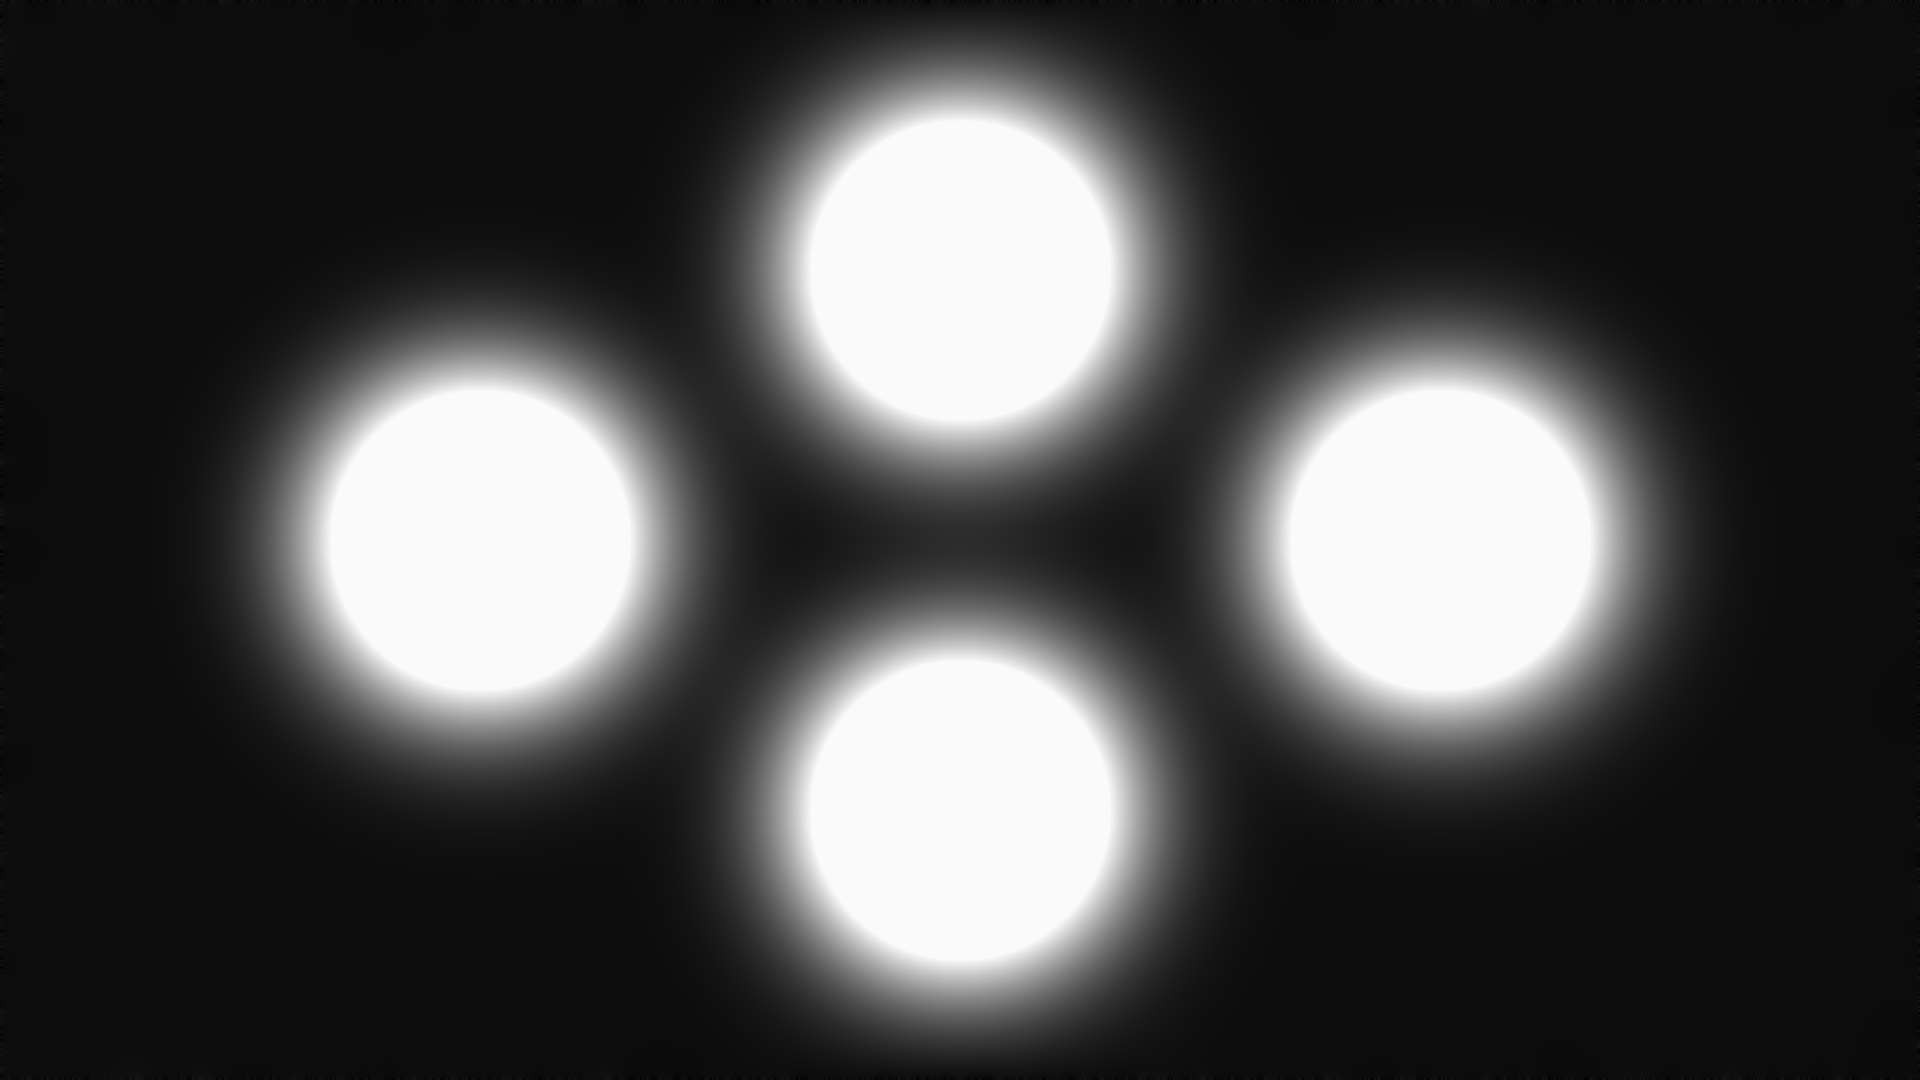

In [11]:
display(potential*25)

In [5]:
iterations = 5000
error = 0.05
A = Jacobi_fx(potential, mask, iterations, error)


In [6]:
A[1], A[2]

(0.1109103072230937, 5000)

In [7]:
A[0]

<MemoryView of 'ndarray' at 0x229fe828d40>

In [8]:
test = 25*np.asarray(A[0])
np.max(test)

250.0

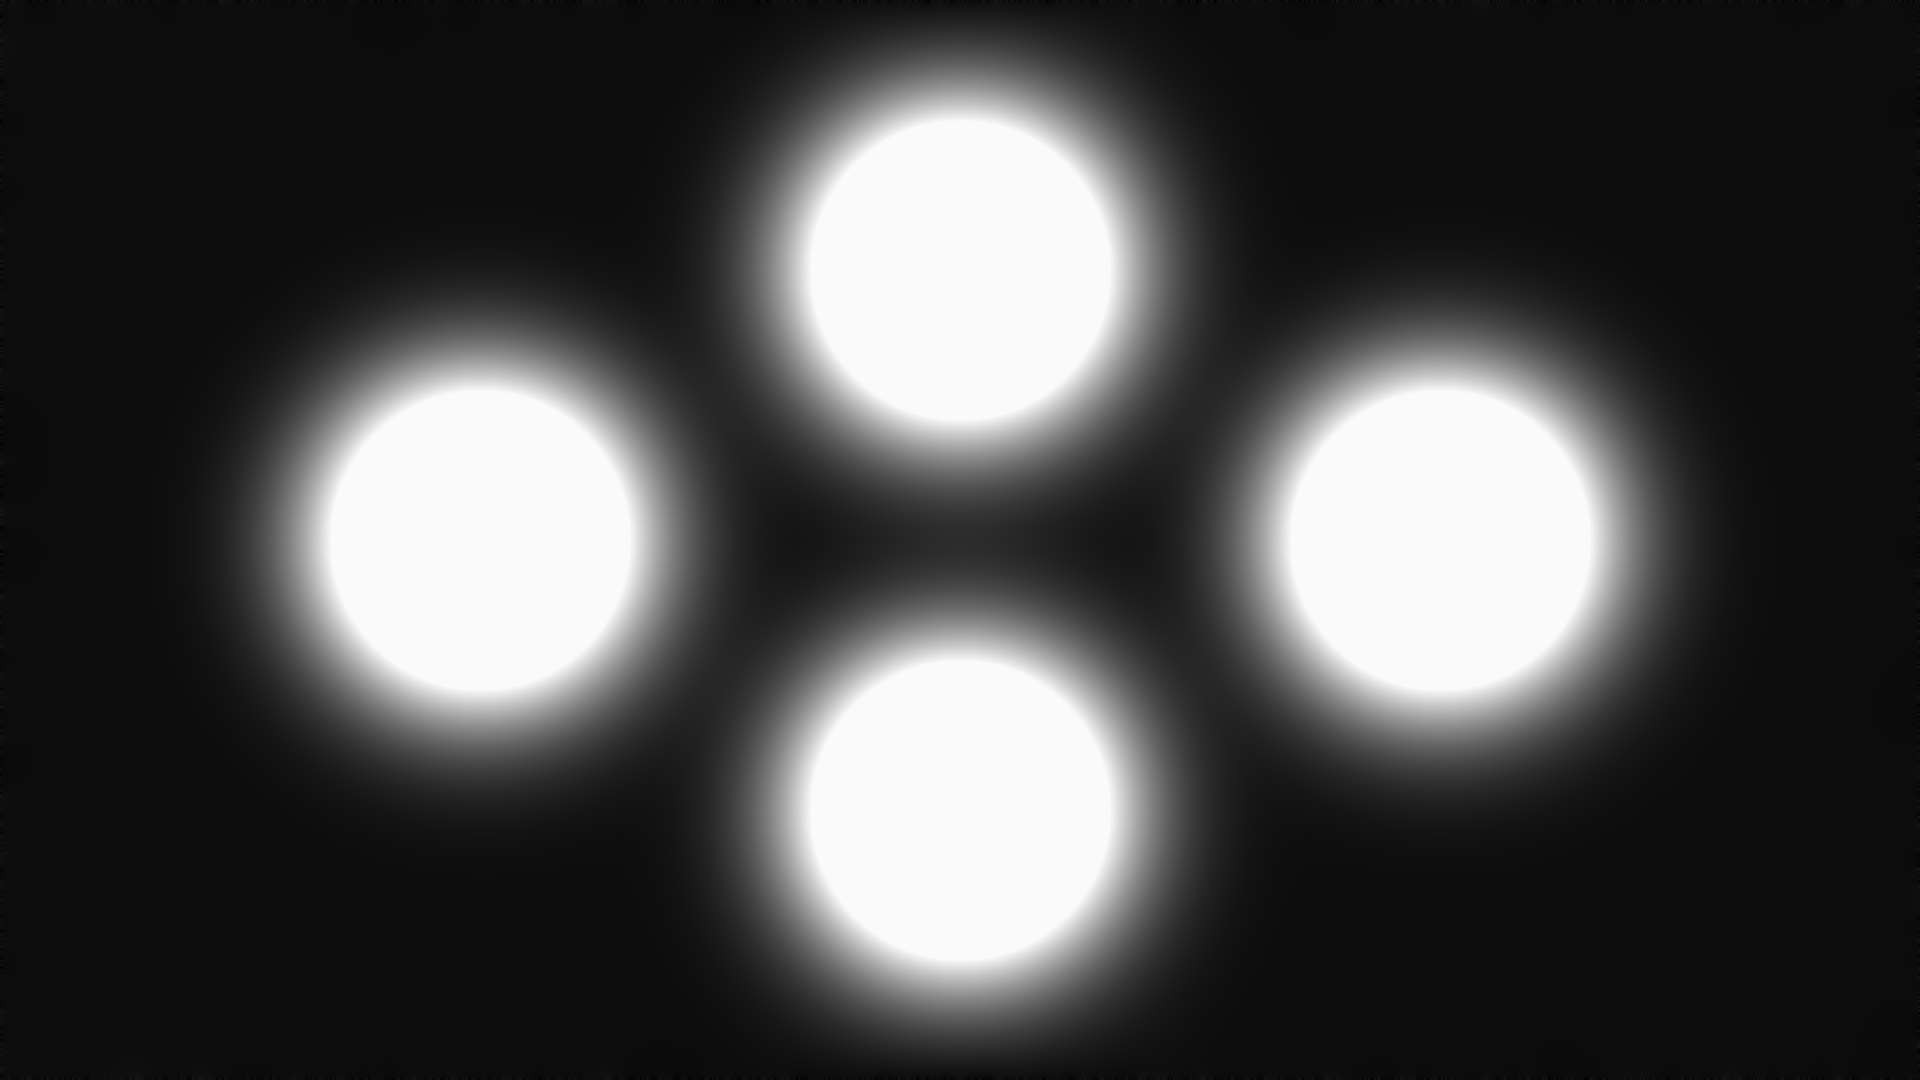

In [9]:
display(test)

In [ ]:

%timeit Jacobi_fx(potential, mask, iterations, error)